In [1]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from matplotlib.pyplot import specgram
import pandas as pd
import glob 
from sklearn.metrics import confusion_matrix
import IPython.display as ipd  # To play sound in the notebook
import os
import sys
import warnings
# ignore warnings 
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

### Exploring for different dataset

In [2]:
### dir path for data

RAV = 'data/audio_song_actors_01-24/' 

TESS = 'data/TESS/'

SAVEE = 'data/SAVEE/AudioData/'

CREMA = 'data/CREMAD/AudioWAV/'

### RAV DATA

In [3]:
# Checking data

dir_list = os.listdir(RAV)
dir_list.sort()

emotion = []
gender = []
path = []

for i in dir_list:
    fname = os.listdir(RAV + i)
    for f in fname:
        part = f.split('.')[0].split('-')
        emotion.append(int(part[2]))
        temp = int(part[6])
        if temp%2 == 0:
            temp = "female"
        else:
            temp = "male"
        gender.append(temp)
        path.append(RAV + i + '/' + f)

RAV_df = pd.DataFrame(emotion)
RAV_df = RAV_df.replace({1:'neutral', 2:'happy', 3:'sad', 4:'angry', 5:'fear', 6:'disgust', 7:'surprise'})
RAV_df = pd.concat([pd.DataFrame(gender),RAV_df],axis=1)
RAV_df.columns = ['gender','emotion']
RAV_df['labels'] =RAV_df.gender + '_' + RAV_df.emotion
RAV_df['source'] = 'RAVDESS'  
RAV_df = pd.concat([RAV_df,pd.DataFrame(path, columns = ['path'])],axis=1)
RAV_df = RAV_df.drop(['gender', 'emotion'], axis=1)
RAV_df.labels.value_counts()

male_angry        96
male_disgust      96
male_happy        96
male_sad          96
male_fear         96
female_angry      88
female_fear       88
female_happy      88
female_sad        88
female_disgust    88
male_neutral      48
female_neutral    44
Name: labels, dtype: int64

In [4]:
RAV_df

,labels,source,path
0,male_sad,RAVDESS,data/audio_song_actors_01-24/Actor_01/03-02-03...
1,male_sad,RAVDESS,data/audio_song_actors_01-24/Actor_01/03-02-03...
2,male_fear,RAVDESS,data/audio_song_actors_01-24/Actor_01/03-02-05...
3,male_disgust,RAVDESS,data/audio_song_actors_01-24/Actor_01/03-02-06...
4,male_happy,RAVDESS,data/audio_song_actors_01-24/Actor_01/03-02-02...
...,...,...,...
1007,female_happy,RAVDESS,data/audio_song_actors_01-24/Actor_24/03-02-02...
1008,female_angry,RAVDESS,data/audio_song_actors_01-24/Actor_24/03-02-04...
1009,female_disgust,RAVDESS,data/audio_song_actors_01-24/Actor_24/03-02-06...
1010,female_fear,RAVDESS,data/audio_song_actors_01-24/Actor_24/03-02-05...


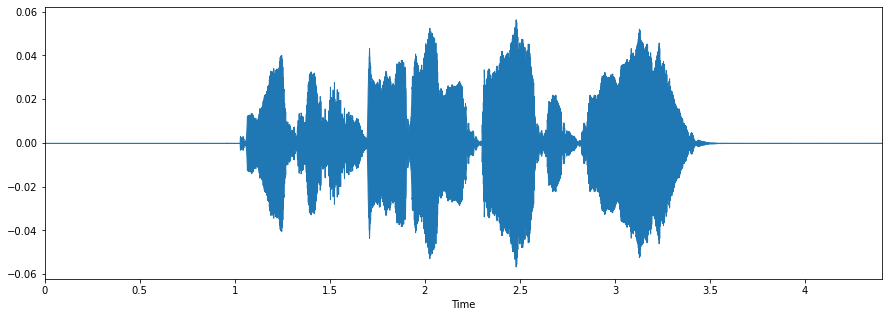

In [5]:
# Pick a fearful track
fname = RAV + 'Actor_14/03-02-04-01-02-02-14.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

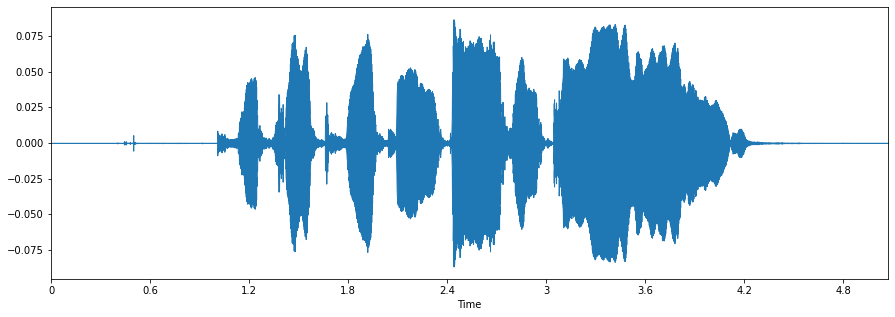

In [6]:
# one more track
fname = RAV + 'Actor_16/03-02-02-02-01-01-16.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [7]:
RAV_df.shape

(1012, 3)

### TESS DATA

In [8]:
## Another data TESS

dir_list = os.listdir(TESS)

dir_list.sort()

dir_list

['OAF_back_angry.wav',
 'OAF_back_disgust.wav',
 'OAF_back_fear.wav',
 'OAF_back_happy.wav',
 'OAF_back_neutral.wav',
 'OAF_back_ps.wav',
 'OAF_back_sad.wav',
 'OAF_bar_angry.wav',
 'OAF_bar_disgust.wav',
 'OAF_bar_fear.wav',
 'OAF_bar_happy.wav',
 'OAF_bar_neutral.wav',
 'OAF_bar_ps.wav',
 'OAF_bar_sad.wav',
 'OAF_base_angry.wav',
 'OAF_base_disgust.wav',
 'OAF_base_fear.wav',
 'OAF_base_happy.wav',
 'OAF_base_neutral.wav',
 'OAF_base_ps.wav',
 'OAF_base_sad.wav',
 'OAF_bath_angry.wav',
 'OAF_bath_disgust.wav',
 'OAF_bath_fear.wav',
 'OAF_bath_happy.wav',
 'OAF_bath_neutral.wav',
 'OAF_bath_ps.wav',
 'OAF_bath_sad.wav',
 'OAF_bean_angry.wav',
 'OAF_bean_disgust.wav',
 'OAF_bean_fear.wav',
 'OAF_bean_happy.wav',
 'OAF_bean_neutral.wav',
 'OAF_bean_ps.wav',
 'OAF_bean_sad.wav',
 'OAF_beg_angry.wav',
 'OAF_beg_disgust.wav',
 'OAF_beg_fear.wav',
 'OAF_beg_happy.wav',
 'OAF_beg_neutral.wav',
 'OAF_beg_ps.wav',
 'OAF_beg_sad.wav',
 'OAF_bite_angry.wav',
 'OAF_bite_disgust.wav',
 'OAF_bite_f

In [9]:
path = []
emotion = []

fname = os.listdir(TESS)
for i in fname:
    if (i.startswith('OAF') & (i.endswith('angry.wav')))  or  (i.startswith('YAF') & (i.endswith('angry.wav'))):
        emotion.append('female_angry')
            
    elif (i.startswith('OAF') & (i.endswith('disgust.wav')))  or  (i.startswith('YAF') & (i.endswith('disgust.wav'))):
        emotion.append('female_disgust')
            
    elif (i.startswith('OAF') & (i.endswith('fear.wav')))  or  (i.startswith('YAF') & (i.endswith('fear.wav'))):
        emotion.append('female_fear')
            
    elif (i.startswith('OAF') & (i.endswith('happy.wav')))  or  (i.startswith('YAF') & (i.endswith('happy.wav'))):
        emotion.append('female_happy')
            
    elif (i.startswith('OAF') & (i.endswith('neutral.wav')))  or  (i.startswith('YAF') & (i.endswith('neutral.wav'))):
        emotion.append('female_neutral')
            
    elif (i.startswith('OAF') & (i.endswith('ps.wav')))  or  (i.startswith('YAF') & (i.endswith('ps.wav'))):
        emotion.append('female_Pleasant_surprise')
            
    elif (i.startswith('OAF') & (i.endswith('sad.wav')))  or  (i.startswith('YAF') & (i.endswith('sad.wav'))):
        emotion.append('female_sad')
            
    else:
        emotion.append('Unknown')
            
    path.append(TESS + i )

In [10]:
TESS_df = pd.DataFrame(emotion, columns = ['labels'])
TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['path'])],axis=1)
TESS_df.labels.value_counts()

female_angry                400
female_disgust              400
female_neutral              400
female_happy                400
female_sad                  400
female_fear                 400
female_Pleasant_surprise    400
Name: labels, dtype: int64

In [11]:
TESS_df

,labels,source,path
0,female_Pleasant_surprise,TESS,data/TESS/OAF_cause_ps.wav
1,female_Pleasant_surprise,TESS,data/TESS/YAF_pearl_ps.wav
2,female_fear,TESS,data/TESS/OAF_keen_fear.wav
3,female_Pleasant_surprise,TESS,data/TESS/OAF_kick_ps.wav
4,female_angry,TESS,data/TESS/YAF_should_angry.wav
...,...,...,...
2795,female_sad,TESS,data/TESS/YAF_moon_sad.wav
2796,female_disgust,TESS,data/TESS/YAF_met_disgust.wav
2797,female_Pleasant_surprise,TESS,data/TESS/OAF_wag_ps.wav
2798,female_angry,TESS,data/TESS/OAF_youth_angry.wav


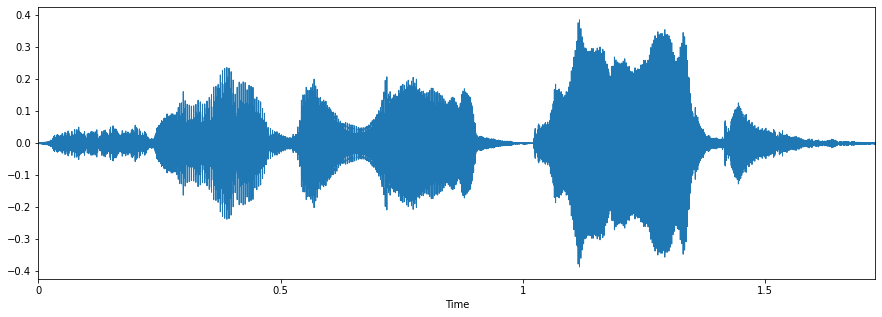

In [12]:
# lets play a fearful track 
fname = TESS + 'YAF_dog_fear.wav' 

data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

### SAVEE DATA

In [13]:
dir_list = os.listdir(SAVEE)

dir_list

['JK', 'KL', 'JE', 'DC']

In [14]:
path = []
emotion = []

for i in dir_list:
    fname = os.listdir(SAVEE + i +'/')
    for f in fname:
        if f.startswith('a'):
            emotion.append('male_angry')
        elif f.startswith('d'):
            emotion.append('male_disgust')
        elif f.startswith('f'):
            emotion.append('male_fear')
        elif f.startswith('h'):
            emotion.append('male_happy')
        elif f.startswith('n'):
            emotion.append('male_neutral')
        elif f.startswith('sa'):
            emotion.append('male_sad')
        elif f.startswith('su'):
            emotion.append('male_surprise')
        else:
            emotion.append('male_error')
        
        path.append(SAVEE + i + '/' + f )

In [15]:
SAVEE_df = pd.DataFrame(emotion, columns = ['labels'])
SAVEE_df['source'] = 'SAVEE'
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['path'])], axis = 1)
SAVEE_df.labels.value_counts()

male_neutral     120
male_happy        60
male_sad          60
male_fear         60
male_surprise     60
male_angry        60
male_disgust      60
Name: labels, dtype: int64

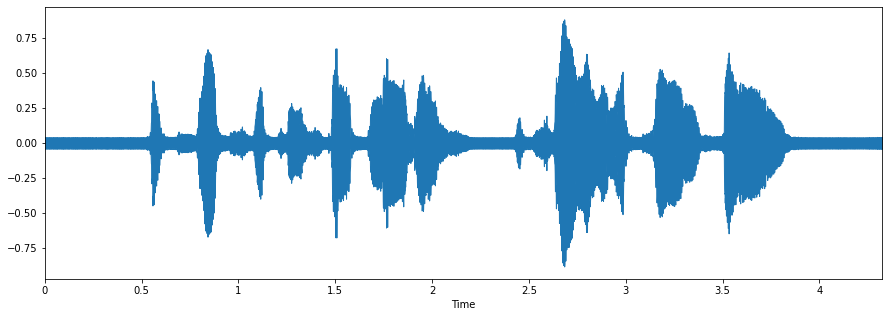

In [16]:
# use the well known Librosa library for this task 

fname = SAVEE + 'DC/f11.wav'  
data, sampling_rate = librosa.load(fname)
plt.figure(figsize=(15, 5))
librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [17]:
SAVEE_df

,labels,source,path
0,male_neutral,SAVEE,data/SAVEE/AudioData/JK/n11.wav
1,male_sad,SAVEE,data/SAVEE/AudioData/JK/sa15.wav
2,male_fear,SAVEE,data/SAVEE/AudioData/JK/f09.wav
3,male_fear,SAVEE,data/SAVEE/AudioData/JK/f11.wav
4,male_angry,SAVEE,data/SAVEE/AudioData/JK/a05.wav
...,...,...,...
475,male_disgust,SAVEE,data/SAVEE/AudioData/DC/d08.wav
476,male_happy,SAVEE,data/SAVEE/AudioData/DC/h11.wav
477,male_sad,SAVEE,data/SAVEE/AudioData/DC/sa12.wav
478,male_surprise,SAVEE,data/SAVEE/AudioData/DC/su04.wav


### CREMA DATA

In [18]:
dir_list = os.listdir(CREMA)

dir_list.sort()

dir_list

['1001_DFA_ANG_XX.wav',
 '1001_DFA_DIS_XX.wav',
 '1001_DFA_FEA_XX.wav',
 '1001_DFA_HAP_XX.wav',
 '1001_DFA_NEU_XX.wav',
 '1001_DFA_SAD_XX.wav',
 '1001_IEO_ANG_HI.wav',
 '1001_IEO_ANG_LO.wav',
 '1001_IEO_ANG_MD.wav',
 '1001_IEO_DIS_HI.wav',
 '1001_IEO_DIS_LO.wav',
 '1001_IEO_DIS_MD.wav',
 '1001_IEO_FEA_HI.wav',
 '1001_IEO_FEA_LO.wav',
 '1001_IEO_FEA_MD.wav',
 '1001_IEO_HAP_HI.wav',
 '1001_IEO_HAP_LO.wav',
 '1001_IEO_HAP_MD.wav',
 '1001_IEO_NEU_XX.wav',
 '1001_IEO_SAD_HI.wav',
 '1001_IEO_SAD_LO.wav',
 '1001_IEO_SAD_MD.wav',
 '1001_IOM_ANG_XX.wav',
 '1001_IOM_DIS_XX.wav',
 '1001_IOM_FEA_XX.wav',
 '1001_IOM_HAP_XX.wav',
 '1001_IOM_NEU_XX.wav',
 '1001_IOM_SAD_XX.wav',
 '1001_ITH_ANG_XX.wav',
 '1001_ITH_DIS_XX.wav',
 '1001_ITH_FEA_XX.wav',
 '1001_ITH_HAP_XX.wav',
 '1001_ITH_NEU_XX.wav',
 '1001_ITH_SAD_XX.wav',
 '1001_ITS_ANG_XX.wav',
 '1001_ITS_DIS_XX.wav',
 '1001_ITS_FEA_XX.wav',
 '1001_ITS_HAP_XX.wav',
 '1001_ITS_NEU_XX.wav',
 '1001_ITS_SAD_XX.wav',
 '1001_IWL_ANG_XX.wav',
 '1001_IWL_DIS_X

In [19]:
gender = []
emotion = []
path = []
female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]

for i in dir_list: 
    part = i.split('_')
    if int(part[0]) in female:
        temp = 'female'
    else:
        temp = 'male'
    gender.append(temp)
    
    if part[2] == 'SAD' and temp == 'male':
        emotion.append('male_sad')
    elif part[2] == 'ANG' and temp == 'male':
        emotion.append('male_angry')
    elif part[2] == 'DIS' and temp == 'male':
        emotion.append('male_disgust')
    elif part[2] == 'FEA' and temp == 'male':
        emotion.append('male_fear')
    elif part[2] == 'HAP' and temp == 'male':
        emotion.append('male_happy')
    elif part[2] == 'NEU' and temp == 'male':
        emotion.append('male_neutral')
    elif part[2] == 'SAD' and temp == 'female':
        emotion.append('female_sad')
    elif part[2] == 'ANG' and temp == 'female':
        emotion.append('female_angry')
    elif part[2] == 'DIS' and temp == 'female':
        emotion.append('female_disgust')
    elif part[2] == 'FEA' and temp == 'female':
        emotion.append('female_fear')
    elif part[2] == 'HAP' and temp == 'female':
        emotion.append('female_happy')
    elif part[2] == 'NEU' and temp == 'female':
        emotion.append('female_neutral')
    else:
        emotion.append('Unknown')
        
    path.append(CREMA + i)



In [20]:
CREMA_df = pd.DataFrame(emotion, columns = ['labels'])
CREMA_df['source'] = 'CREMA'
CREMA_df = pd.concat([CREMA_df,pd.DataFrame(path, columns = ['path'])],axis=1)
CREMA_df.labels.value_counts()

male_disgust      671
male_happy        671
male_sad          671
male_angry        671
male_fear         671
female_disgust    600
female_happy      600
female_fear       600
female_sad        600
female_angry      600
male_neutral      575
female_neutral    512
Name: labels, dtype: int64

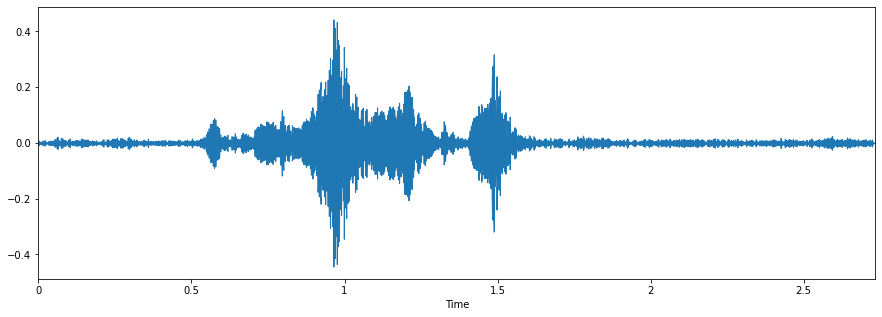

In [21]:
# use the well known Librosa library for this task 

fname = CREMA + '1012_IEO_HAP_HI.wav' 

data, sampling_rate = librosa.load(fname)

plt.figure(figsize=(15, 5))

librosa.display.waveplot(data, sr=sampling_rate)

# Lets play the audio 
ipd.Audio(fname)

In [22]:
CREMA_df

,labels,source,path
0,male_angry,CREMA,data/CREMAD/AudioWAV/1001_DFA_ANG_XX.wav
1,male_disgust,CREMA,data/CREMAD/AudioWAV/1001_DFA_DIS_XX.wav
2,male_fear,CREMA,data/CREMAD/AudioWAV/1001_DFA_FEA_XX.wav
3,male_happy,CREMA,data/CREMAD/AudioWAV/1001_DFA_HAP_XX.wav
4,male_neutral,CREMA,data/CREMAD/AudioWAV/1001_DFA_NEU_XX.wav
...,...,...,...
7437,female_disgust,CREMA,data/CREMAD/AudioWAV/1091_WSI_DIS_XX.wav
7438,female_fear,CREMA,data/CREMAD/AudioWAV/1091_WSI_FEA_XX.wav
7439,female_happy,CREMA,data/CREMAD/AudioWAV/1091_WSI_HAP_XX.wav
7440,female_neutral,CREMA,data/CREMAD/AudioWAV/1091_WSI_NEU_XX.wav


### Combining all dataset to make one big data

In [23]:
df = pd.concat([SAVEE_df, RAV_df, TESS_df, CREMA_df], axis = 0)

print(df.labels.value_counts())

df.head()

df.to_csv("Data_path.csv",index=False)

female_sad                  1088
female_fear                 1088
female_angry                1088
female_disgust              1088
female_happy                1088
female_neutral               956
male_disgust                 827
male_sad                     827
male_angry                   827
male_fear                    827
male_happy                   827
male_neutral                 743
female_Pleasant_surprise     400
male_surprise                 60
Name: labels, dtype: int64


In [24]:
df.head()

,labels,source,path
0,male_neutral,SAVEE,data/SAVEE/AudioData/JK/n11.wav
1,male_sad,SAVEE,data/SAVEE/AudioData/JK/sa15.wav
2,male_fear,SAVEE,data/SAVEE/AudioData/JK/f09.wav
3,male_fear,SAVEE,data/SAVEE/AudioData/JK/f11.wav
4,male_angry,SAVEE,data/SAVEE/AudioData/JK/a05.wav


In [25]:
df.shape

(11734, 3)

In [26]:
# Note this takes a couple of minutes (~10 mins) as we're iterating over 4 datasets 
df_fn = pd.DataFrame(columns=['feature'])

# loop feature extraction over the entire dataset
counter=0
for index,path in enumerate(df.path):
    X, sample_rate = librosa.load(path
                                  , res_type='kaiser_fast'
                                  ,duration=4.5
                                  ,sr=44100
                                  ,offset=0.5
                                )
    sample_rate = np.array(sample_rate)
    
    # mean as the feature. Could do min and max etc as well. 
    '''MFCCS: Mel Frequency Cepstral Coefficients form a cepstral representation where 
      the frequency bands are not linear but distributed according to the mel-scale.'''
    mfccs = np.mean(librosa.feature.mfcc(y=X, 
                                        sr=sample_rate, 
                                        n_mfcc=13),
                    axis=0)
    df_fn.loc[counter] = [mfccs]
    counter=counter+1   

# Check a few records to make sure its processed successfully
print(len(df_fn))
df_fn.head(10)

11734


,feature
0,"[-27.742989, -26.140919, -24.173595, -22.90852..."
1,"[-23.371296, -24.25871, -24.391258, -23.972637..."
2,"[-21.902924, -23.273619, -21.924248, -22.12366..."
3,"[-20.43938, -19.80349, -19.874773, -20.120983,..."
4,"[4.8579617, 2.1802886, -2.7702484, -1.9958279,..."
5,"[-28.027388, -26.05819, -25.802074, -26.164665..."
6,"[-25.238075, -23.353786, -24.034422, -23.67775..."
7,"[0.1624129, -0.4854953, 0.2700264, 1.1002197, ..."
8,"[-25.446177, -23.656832, -26.075031, -23.22441..."
9,"[1.7671392, 1.5518557, -3.4909468, -5.7483816,..."


In [27]:
df_new = pd.DataFrame(df_fn['feature'].values.tolist())

In [28]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,387
0,-27.742989,-26.140919,-24.173595,-22.908520,-23.622379,-24.026022,-12.773024,-8.232546,-5.508794,-3.762222,...,-23.925617,-23.662863,-19.047081,-17.226658,-15.908207,-14.379389,-14.313459,-12.873527,-12.194535,-11.942251
1,-23.371296,-24.258711,-24.391258,-23.972637,-23.494141,-24.208843,-25.631187,-25.475376,-26.295382,-26.493526,...,-5.594566,-5.531479,-5.478800,-5.941346,-7.105324,-8.239363,-8.801979,-8.749238,-8.251348,-9.029412
2,-21.902924,-23.273619,-21.924248,-22.123661,-24.271193,-23.458073,-22.998421,-21.531004,-19.574873,-17.620256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-20.439381,-19.803490,-19.874773,-20.120983,-20.931410,-23.359619,-25.366274,-22.667360,-21.782948,-23.688148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4.857962,2.180289,-2.770248,-1.995828,-0.780680,-0.125301,-0.136835,-2.471162,-7.706022,-13.459490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11729,-18.833897,-16.358940,-16.981724,-16.507805,-16.262648,-16.896891,-16.555403,-15.997498,-14.659115,-17.664810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11730,-20.607792,-19.017670,-19.228441,-20.902081,-20.060429,-19.458862,-22.619347,-22.565613,-22.109285,-22.837191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11731,-21.098043,-20.155556,-19.352476,-20.549416,-19.826164,-18.723145,-18.076763,-20.378277,-20.103228,-18.496424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11732,-21.708447,-20.894457,-21.929399,-22.721510,-21.201597,-18.587864,-16.677309,-17.974516,-17.923595,-17.347212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [30]:
# Now extract the mean bands to its own feature columns
#df_fn = pd.concat([df,df_new], axis = 1)

#df_final = df.merge(df_new, left_on = 'labels')

#df.join(df_new).head(10)
#pd.merge(df, df_new, left_index=True, right_index=True).head(10)
#pd.concat([df,pd.DataFrame(df_fn['feature'].values.tolist())], axis = 1)
print (df.shape)
print (df_new.shape)

(11734, 3)
(11734, 388)


In [33]:
df_new.describe()

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,387
count,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,11734.000000,...,336.000000,336.000000,322.000000,321.000000,320.000000,298.000000,295.000000,295.000000,276.000000,276.000000
mean,-19.744028,-20.307745,-22.933003,-22.852918,-22.747906,-22.675583,-22.582212,-22.510921,-22.435079,-22.397080,...,-45.167984,-45.226891,-44.730113,-44.755450,-44.838714,-44.100670,-44.524866,-44.641842,-44.130944,-43.744637
std,12.007714,11.450816,11.425573,11.444064,11.461049,11.469949,11.491410,11.482437,11.485576,11.479628,...,17.491262,17.312009,17.386273,17.453078,17.429009,17.472112,17.271629,17.062780,17.233833,17.933530
min,-87.028526,-87.028526,-87.028526,-87.028526,-87.028526,-87.028526,-87.028526,-87.028526,-87.028526,-87.028526,...,-69.896652,-69.896652,-69.673172,-69.799026,-69.799026,-67.883575,-67.863655,-67.869637,-67.883575,-70.593880
25%,-21.446037,-21.063635,-27.068859,-26.930837,-26.781641,-26.641485,-26.461079,-26.324214,-26.225677,-26.106734,...,-58.170918,-57.919728,-57.903680,-58.149910,-57.903938,-57.429974,-57.787498,-57.909447,-58.136033,-58.167371
50%,-17.963743,-18.053812,-19.223847,-19.170944,-19.067972,-19.052248,-18.971353,-18.909954,-18.823186,-18.769984,...,-51.437372,-51.353367,-51.053843,-50.848145,-50.971567,-50.541039,-50.977924,-50.709225,-49.667435,-50.417246
75%,-13.651310,-14.748652,-16.090323,-15.907199,-15.843717,-15.772889,-15.595290,-15.535198,-15.470507,-15.396844,...,-32.335485,-33.616097,-28.336596,-28.909859,-29.046811,-27.323414,-28.940170,-28.143103,-27.515013,-26.928003
max,11.171943,6.345472,7.022679,6.985440,6.008344,4.015903,2.500369,2.781997,2.559836,0.964220,...,-0.956666,-0.950596,-0.873556,-0.407649,-0.449257,-1.229812,-2.182870,-3.361141,-2.887614,1.028342


In [35]:
df['labels'].tolist()

['male_neutral',
 'male_sad',
 'male_fear',
 'male_fear',
 'male_angry',
 'male_neutral',
 'male_disgust',
 'male_angry',
 'male_neutral',
 'male_angry',
 'male_angry',
 'male_disgust',
 'male_happy',
 'male_surprise',
 'male_disgust',
 'male_neutral',
 'male_surprise',
 'male_fear',
 'male_disgust',
 'male_neutral',
 'male_fear',
 'male_fear',
 'male_disgust',
 'male_sad',
 'male_sad',
 'male_angry',
 'male_neutral',
 'male_surprise',
 'male_angry',
 'male_neutral',
 'male_surprise',
 'male_angry',
 'male_happy',
 'male_happy',
 'male_disgust',
 'male_angry',
 'male_surprise',
 'male_fear',
 'male_fear',
 'male_disgust',
 'male_disgust',
 'male_happy',
 'male_disgust',
 'male_happy',
 'male_happy',
 'male_neutral',
 'male_neutral',
 'male_neutral',
 'male_surprise',
 'male_surprise',
 'male_sad',
 'male_neutral',
 'male_neutral',
 'male_disgust',
 'male_neutral',
 'male_sad',
 'male_fear',
 'male_neutral',
 'male_neutral',
 'male_disgust',
 'male_neutral',
 'male_happy',
 'male_sad',


In [36]:
df_new['labels']  =df['labels'].tolist()

In [37]:
df_new

,0,1,2,3,4,5,6,7,8,9,...,379,380,381,382,383,384,385,386,387,labels
0,-27.742989,-26.140919,-24.173595,-22.908520,-23.622379,-24.026022,-12.773024,-8.232546,-5.508794,-3.762222,...,-23.662863,-19.047081,-17.226658,-15.908207,-14.379389,-14.313459,-12.873527,-12.194535,-11.942251,male_neutral
1,-23.371296,-24.258711,-24.391258,-23.972637,-23.494141,-24.208843,-25.631187,-25.475376,-26.295382,-26.493526,...,-5.531479,-5.478800,-5.941346,-7.105324,-8.239363,-8.801979,-8.749238,-8.251348,-9.029412,male_sad
2,-21.902924,-23.273619,-21.924248,-22.123661,-24.271193,-23.458073,-22.998421,-21.531004,-19.574873,-17.620256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fear
3,-20.439381,-19.803490,-19.874773,-20.120983,-20.931410,-23.359619,-25.366274,-22.667360,-21.782948,-23.688148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fear
4,4.857962,2.180289,-2.770248,-1.995828,-0.780680,-0.125301,-0.136835,-2.471162,-7.706022,-13.459490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11729,-18.833897,-16.358940,-16.981724,-16.507805,-16.262648,-16.896891,-16.555403,-15.997498,-14.659115,-17.664810,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_disgust
11730,-20.607792,-19.017670,-19.228441,-20.902081,-20.060429,-19.458862,-22.619347,-22.565613,-22.109285,-22.837191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_fear
11731,-21.098043,-20.155556,-19.352476,-20.549416,-19.826164,-18.723145,-18.076763,-20.378277,-20.103228,-18.496424,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_happy
11732,-21.708447,-20.894457,-21.929399,-22.721510,-21.201597,-18.587864,-16.677309,-17.974516,-17.923595,-17.347212,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,female_neutral


In [38]:
df_new['path']  =df['path'].tolist()

In [40]:
df_new['source']  =df['source'].tolist()

In [42]:
df_new.head()

,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,labels,path,source
0,-27.742989,-26.140919,-24.173595,-22.908520,-23.622379,-24.026022,-12.773024,-8.232546,-5.508794,-3.762222,...,-17.226658,-15.908207,-14.379389,-14.313459,-12.873527,-12.194535,-11.942251,male_neutral,data/SAVEE/AudioData/JK/n11.wav,SAVEE
1,-23.371296,-24.258711,-24.391258,-23.972637,-23.494141,-24.208843,-25.631187,-25.475376,-26.295382,-26.493526,...,-5.941346,-7.105324,-8.239363,-8.801979,-8.749238,-8.251348,-9.029412,male_sad,data/SAVEE/AudioData/JK/sa15.wav,SAVEE
2,-21.902924,-23.273619,-21.924248,-22.123661,-24.271193,-23.458073,-22.998421,-21.531004,-19.574873,-17.620256,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fear,data/SAVEE/AudioData/JK/f09.wav,SAVEE
3,-20.439381,-19.803490,-19.874773,-20.120983,-20.931410,-23.359619,-25.366274,-22.667360,-21.782948,-23.688148,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_fear,data/SAVEE/AudioData/JK/f11.wav,SAVEE
4,4.857962,2.180289,-2.770248,-1.995828,-0.780680,-0.125301,-0.136835,-2.471162,-7.706022,-13.459490,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,male_angry,data/SAVEE/AudioData/JK/a05.wav,SAVEE


In [44]:
# replace NA with 0

df_new =df_new.fillna(0)

print(df_new.shape)

df_new.head()

(11734, 391)


,0,1,2,3,4,5,6,7,8,9,...,381,382,383,384,385,386,387,labels,path,source
0,-27.742989,-26.140919,-24.173595,-22.908520,-23.622379,-24.026022,-12.773024,-8.232546,-5.508794,-3.762222,...,-17.226658,-15.908207,-14.379389,-14.313459,-12.873527,-12.194535,-11.942251,male_neutral,data/SAVEE/AudioData/JK/n11.wav,SAVEE
1,-23.371296,-24.258711,-24.391258,-23.972637,-23.494141,-24.208843,-25.631187,-25.475376,-26.295382,-26.493526,...,-5.941346,-7.105324,-8.239363,-8.801979,-8.749238,-8.251348,-9.029412,male_sad,data/SAVEE/AudioData/JK/sa15.wav,SAVEE
2,-21.902924,-23.273619,-21.924248,-22.123661,-24.271193,-23.458073,-22.998421,-21.531004,-19.574873,-17.620256,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_fear,data/SAVEE/AudioData/JK/f09.wav,SAVEE
3,-20.439381,-19.803490,-19.874773,-20.120983,-20.931410,-23.359619,-25.366274,-22.667360,-21.782948,-23.688148,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_fear,data/SAVEE/AudioData/JK/f11.wav,SAVEE
4,4.857962,2.180289,-2.770248,-1.995828,-0.780680,-0.125301,-0.136835,-2.471162,-7.706022,-13.459490,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,male_angry,data/SAVEE/AudioData/JK/a05.wav,SAVEE


In [46]:
# sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Split between train and test 

X_train, X_test, y_train, y_test = train_test_split(df_new.drop(['path','labels','source'],axis=1)
                                                    , df_new.labels
                                                    , test_size=0.25
                                                    , shuffle=True
                                                    , random_state=42
                                                   )

In [47]:
# Lets do data normalization 

mean = np.mean(X_train, axis=0)
std = np.std(X_train, axis=0)


X_train = (X_train - mean)/std
X_test = (X_test - mean)/std

In [48]:
# Random check the  train-dataset now 

X_train[150:160]

,0,1,2,3,4,5,6,7,8,9,...,378,379,380,381,382,383,384,385,386,387
456,-0.318201,-0.312472,-0.047822,-0.008512,-0.033105,0.183004,0.314628,0.877259,0.951639,0.948468,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
3499,1.026423,0.751491,-0.440575,-0.483787,-0.378709,-0.374219,-0.398483,-0.455264,-0.448033,-0.442382,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
9251,1.196471,0.981239,0.738626,0.712997,0.639607,0.681393,0.773685,0.608266,0.761560,0.800489,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
239,0.257025,0.189057,0.043961,-0.053394,-0.235886,-0.341852,-0.588750,-0.655549,-0.582207,-0.514748,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
7515,0.012152,-0.048269,-0.014243,0.175040,0.349073,0.281425,0.218330,0.202710,0.071267,-0.155515,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
4705,0.012395,0.025486,0.396887,0.526660,0.494847,0.178410,0.283241,0.295785,0.188766,0.389154,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
6181,0.804703,0.774778,1.035922,0.960817,0.701704,0.791150,0.769624,0.617538,0.548094,0.699470,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
5151,1.058831,0.934658,1.033925,1.185200,1.181732,1.022537,1.027390,0.978675,0.901651,1.112039,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
5278,0.795397,0.736481,0.685241,0.706251,0.771224,1.090867,1.260800,1.178277,1.194529,1.076052,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438
8887,0.999496,1.032895,1.159307,1.186659,1.170446,1.112347,1.053298,0.919897,1.206416,1.289680,...,0.158453,0.15872,0.154591,0.154282,0.154043,0.147508,0.147507,0.147811,0.14155,0.140438


In [49]:
# Lets few preparation steps to get it into the correct format for Keras 

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

In [57]:
# Keras
import keras
from keras import regularizers
from keras.preprocessing import sequence
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, Model, model_from_json
from keras.layers import Dense, Embedding, LSTM
from keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint
from tensorflow.keras import optimizers

In [52]:
# one hot encode the target 

lb = LabelEncoder()

y_train = np_utils.to_categorical(lb.fit_transform(y_train))
y_test = np_utils.to_categorical(lb.fit_transform(y_test))


print(X_train.shape)
print(lb.classes_)

(8800, 388)
['female_Pleasant_surprise' 'female_angry' 'female_disgust' 'female_fear'
 'female_happy' 'female_neutral' 'female_sad' 'male_angry' 'male_disgust'
 'male_fear' 'male_happy' 'male_neutral' 'male_sad' 'male_surprise']


In [53]:
import pickle

In [54]:
# Pickel the lb object for future use 
filename = 'labels'
outfile = open(filename,'wb')
pickle.dump(lb,outfile)
outfile.close()

In [55]:
X_train = np.expand_dims(X_train, axis=2)
X_test = np.expand_dims(X_test, axis=2)
X_train.shape

(8800, 388, 1)

In [63]:
## New model

model = Sequential()
model.add(Conv1D(256, 8, padding='same',input_shape=(X_train.shape[1],1)))  # X_train.shape[1] = No. of Columns
model.add(Activation('relu'))
model.add(Conv1D(256, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(128, 8, padding='same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Conv1D(64, 8, padding='same'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(14)) # Target class number
model.add(Activation('softmax'))

opt = keras.optimizers.RMSprop(lr=0.00001, decay=1e-6)
#opt = keras.optimizers.Adam(lr=0.0001)
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_32 (Conv1D)           (None, 388, 256)          2304      
_________________________________________________________________
activation_36 (Activation)   (None, 388, 256)          0         
_________________________________________________________________
conv1d_33 (Conv1D)           (None, 388, 256)          524544    
_________________________________________________________________
batch_normalization_8 (Batch (None, 388, 256)          1024      
_________________________________________________________________
activation_37 (Activation)   (None, 388, 256)          0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 388, 256)          0         
_________________________________________________________________
max_pooling1d_8 (MaxPooling1 (None, 48, 256)          

In [64]:
model.compile(loss='categorical_crossentropy', optimizer=opt,metrics=['accuracy'])

model_history=model.fit(X_train, y_train, batch_size=16, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
550/550 [==============================] - 211s 383ms/step - loss: 2.3684 - accuracy: 0.1957 - val_loss: 2.3952 - val_accuracy: 0.2342
Epoch 2/100
550/550 [==============================] - 215s 390ms/step - loss: 2.1190 - accuracy: 0.2627 - val_loss: 2.1456 - val_accuracy: 0.2716
Epoch 3/100
550/550 [==============================] - 213s 388ms/step - loss: 2.0108 - accuracy: 0.2985 - val_loss: 2.0787 - val_accuracy: 0.3115
Epoch 4/100
550/550 [==============================] - 214s 389ms/step - loss: 1.9412 - accuracy: 0.3227 - val_loss: 2.0170 - val_accuracy: 0.3337
Epoch 5/100
550/550 [==============================] - 220s 399ms/step - loss: 1.8845 - accuracy: 0.3477 - val_loss: 1.9757 - val_accuracy: 0.3367
Epoch 6/100
550/550 [==============================] - 218s 397ms/step - loss: 1.8426 - accuracy: 0.3544 - val_loss: 1.9452 - val_accuracy: 0.3603
Epoch 7/100
550/550 [==============================] - 231s 420ms/step - loss: 1.7968 - accuracy: 0.3791 - val_loss: 1

550/550 [==============================] - 225s 410ms/step - loss: 1.2122 - accuracy: 0.5828 - val_loss: 1.5675 - val_accuracy: 0.4506
Epoch 57/100
550/550 [==============================] - 218s 396ms/step - loss: 1.1992 - accuracy: 0.5807 - val_loss: 1.6077 - val_accuracy: 0.4397
Epoch 58/100
550/550 [==============================] - 216s 393ms/step - loss: 1.1942 - accuracy: 0.5860 - val_loss: 1.5825 - val_accuracy: 0.4424
Epoch 59/100
550/550 [==============================] - 234s 426ms/step - loss: 1.1870 - accuracy: 0.5899 - val_loss: 1.5560 - val_accuracy: 0.4577
Epoch 60/100
550/550 [==============================] - 297s 540ms/step - loss: 1.1833 - accuracy: 0.5941 - val_loss: 1.5818 - val_accuracy: 0.4468
Epoch 61/100
550/550 [==============================] - 293s 533ms/step - loss: 1.1731 - accuracy: 0.5980 - val_loss: 1.5613 - val_accuracy: 0.4513
Epoch 62/100
550/550 [==============================] - 293s 533ms/step - loss: 1.1637 - accuracy: 0.5984 - val_loss: 1.5746 

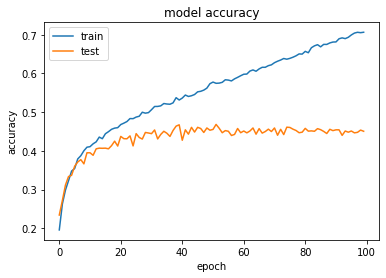

In [65]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

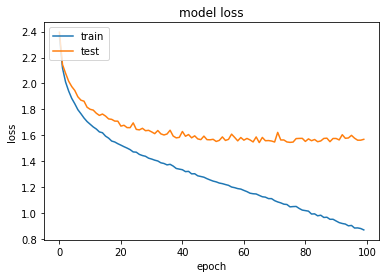

In [66]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()